In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from glob import glob
import tensorflow

### **Load the Images Data**

In [ ]:
images=glob("drive/MyDrive/data/Flickr_Data/Images/*.jpg")

In [ ]:
len(images)

8091

In [ ]:
images[:5]

['drive/MyDrive/data/Flickr_Data/Images/3724738804_f00748a137.jpg',
 'drive/MyDrive/data/Flickr_Data/Images/3767841911_6678052eb6.jpg',
 'drive/MyDrive/data/Flickr_Data/Images/397547349_1fd14b95af.jpg',
 'drive/MyDrive/data/Flickr_Data/Images/374103842_17873ce505.jpg',
 'drive/MyDrive/data/Flickr_Data/Images/3725353555_75c346d7ec.jpg']

### **Load the Text Data**

In [ ]:
captions=open("drive/MyDrive/data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt","rb").read().decode("utf-8").split("\n")

In [ ]:
len(captions)

40461

In [ ]:
captions[:10]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

### **Image PreProsessing**

In [ ]:
img=cv2.imread(images[2])

In [ ]:
img

array([[[ 74,  89,  98],
        [ 60,  76,  82],
        [ 82,  90, 103],
        ...,
        [ 93,  91,  83],
        [ 91,  89,  81],
        [ 93,  90,  85]],

       [[ 67,  75,  82],
        [ 50,  59,  73],
        [ 89, 101, 105],
        ...,
        [ 96,  91,  90],
        [ 93,  88,  87],
        [ 94,  90,  89]],

       [[ 90,  99, 103],
        [ 61,  69,  86],
        [ 60,  74,  73],
        ...,
        [ 95,  89,  90],
        [ 93,  88,  87],
        [ 95,  90,  89]],

       ...,

       [[ 72,  86,  92],
        [ 85,  92, 101],
        [ 84,  96, 102],
        ...,
        [136, 134, 134],
        [134, 132, 132],
        [135, 133, 133]],

       [[ 73,  85,  91],
        [ 85,  90,  99],
        [ 83,  94,  98],
        ...,
        [140, 138, 138],
        [137, 135, 135],
        [138, 136, 136]],

       [[ 81,  91,  98],
        [ 92,  97, 106],
        [ 90, 102, 106],
        ...,
        [125, 126, 124],
        [122, 123, 121],
        [127, 128, 126]]

In [ ]:
img.shape

(500, 475, 3)

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))

In [ ]:
img

array([[[ 81,  72,  61],
        [ 94,  87,  79],
        [103,  95,  80],
        ...,
        [ 53,  54,  51],
        [ 89,  91,  95],
        [ 86,  89,  93]],

       [[ 89,  80,  69],
        [102,  97,  88],
        [ 88,  81,  70],
        ...,
        [ 53,  55,  52],
        [ 89,  90,  95],
        [ 87,  90,  94]],

       [[ 74,  66,  58],
        [113, 108,  93],
        [ 81,  73,  65],
        ...,
        [ 55,  58,  56],
        [ 91,  93,  98],
        [ 88,  88,  93]],

       ...,

       [[107,  96,  83],
        [ 95,  83,  72],
        [104,  97,  75],
        ...,
        [129, 129, 127],
        [126, 127, 127],
        [130, 132, 131]],

       [[101,  93,  81],
        [100,  89,  74],
        [122, 106,  88],
        ...,
        [133, 133, 133],
        [131, 131, 132],
        [130, 130, 132]],

       [[ 98,  90,  82],
        [ 98,  90,  76],
        [104,  92,  79],
        ...,
        [130, 130, 130],
        [130, 130, 130],
        [131, 131, 132]]

In [ ]:
img.shape

(224, 224, 3)

### **Working on resnet50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model

In [ ]:
incept_model=ResNet50(include_top=True)
incept_model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
last_layer=incept_model.layers[-2].output

In [ ]:
from tf.keras.uti

AttributeError: ignored

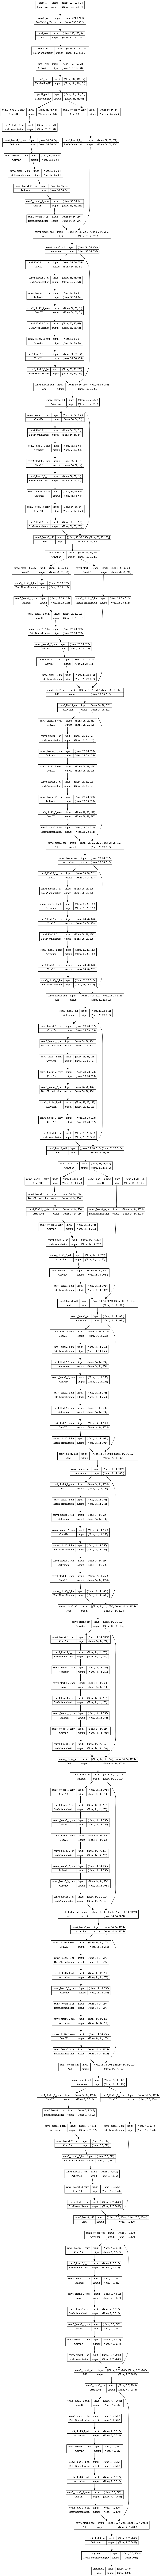

In [ ]:
tensorflow.keras.utils.plot_model(incept_model,show_shapes=True)

In [ ]:
my_model=Model(inputs=incept_model.input,outputs=last_layer)

In [ ]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
img=img.reshape(1,224,224,3)

In [ ]:
img

array([[[[ 81,  72,  61],
         [ 94,  87,  79],
         [103,  95,  80],
         ...,
         [ 53,  54,  51],
         [ 89,  91,  95],
         [ 86,  89,  93]],

        [[ 89,  80,  69],
         [102,  97,  88],
         [ 88,  81,  70],
         ...,
         [ 53,  55,  52],
         [ 89,  90,  95],
         [ 87,  90,  94]],

        [[ 74,  66,  58],
         [113, 108,  93],
         [ 81,  73,  65],
         ...,
         [ 55,  58,  56],
         [ 91,  93,  98],
         [ 88,  88,  93]],

        ...,

        [[107,  96,  83],
         [ 95,  83,  72],
         [104,  97,  75],
         ...,
         [129, 129, 127],
         [126, 127, 127],
         [130, 132, 131]],

        [[101,  93,  81],
         [100,  89,  74],
         [122, 106,  88],
         ...,
         [133, 133, 133],
         [131, 131, 132],
         [130, 130, 132]],

        [[ 98,  90,  82],
         [ 98,  90,  76],
         [104,  92,  79],
         ...,
         [130, 130, 130],
        

In [ ]:
pred=my_model.predict(img)

1/1 [==============================] - 9s 9s/step


In [ ]:
pred.shape

(1, 2048)

In [ ]:
pred

array([[0.11644833, 1.4776341 , 0.06862483, ..., 1.3531923 , 0.749445  ,
        0.479593  ]], dtype=float32)

In [ ]:
img_name=images[2].split("/")
print(img_name)

['drive', 'MyDrive', 'data', 'Flickr_Data', 'Images', '397547349_1fd14b95af.jpg']


In [ ]:
images_features={}

In [ ]:
count=0
for i in images:
    img=cv2.imread(i)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(244,244))
    img=img.reshape(1,244,244,3)

    pred=my_model.predict(img).reshape(2048,)
    img_name=i.split("/")[-1]
    images_features[img_name]=pred
    count=count+1

    if count>149:
        break
    elif count%50==0:
        print(count)

1/1 [==============================] - 0s 25ms/step


KeyboardInterrupt: ignored

In [ ]:
images_features

In [ ]:
images_features={}

In [ ]:
images_features=np.load("/content/drive/MyDrive/data/Flickr_Data/iamges_feature1500.npy",allow_pickle=True)

In [ ]:
images_features=images_features.item()

In [ ]:
len(images_features)

1500

In [ ]:
captions_dict={}
for i in captions:
  try:
    img_name=i.split("\t")[0][:-2]
    caption=i.split("\t")[1]
    if img_name in images_features:
      if img_name not in captions_dict:
        captions_dict[img_name]=[caption]
      else:
        captions_dict[img_name].append(caption)
  except:
    pass

In [ ]:
len(captions_dict)

1500

In [ ]:
captions_dict

{'3516935867_78cf63c69c.jpg': ['A black horse and its rider are clearing a 3 rung high jump in a competition .',
  'A horse and rider leap over a striped hurdle .',
  'A person is riding a horse as it jumps over an obstacle .',
  'A person jumping a horse over a fence .',
  'A rider and horse jumping a fence outdoors .'],
 '3516960094_87fb4889de.jpg': ['a female athlete is jumping into the sand .',
  'A girl is performing the long jump with arms in the air .',
  'A woman competing in a long jump competition .',
  'The woman is jumping a long distance while people watch .',
  'Woman competing in the long jump , photographed in midair .'],
 '3517023411_a8fbd15230.jpg': ['A biker is racing to keep up with the runners',
  'a biker rides down the street .',
  'A man on a red bicycle rides past several pedestrians .',
  'A man with something orange on his helmet riding a bike in a busy setting .',
  'Man rides on bicycle as other people walk .'],
 '3517040752_debec03376.jpg': ['A first basem

### **Check Image with Caption**

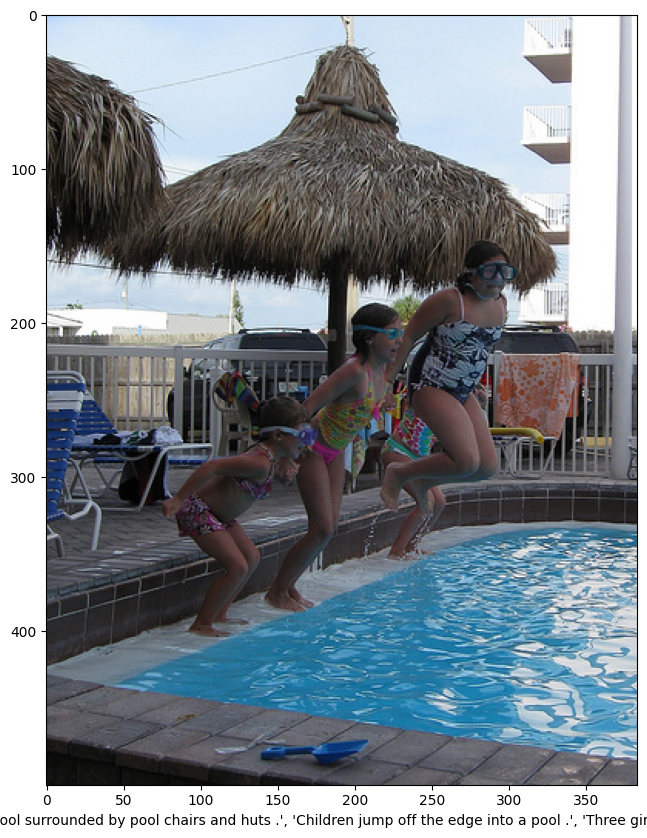

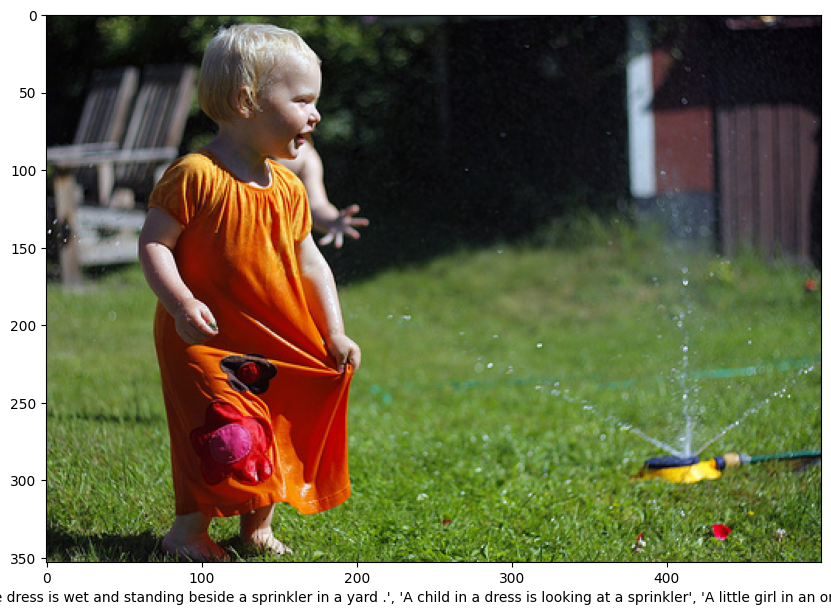

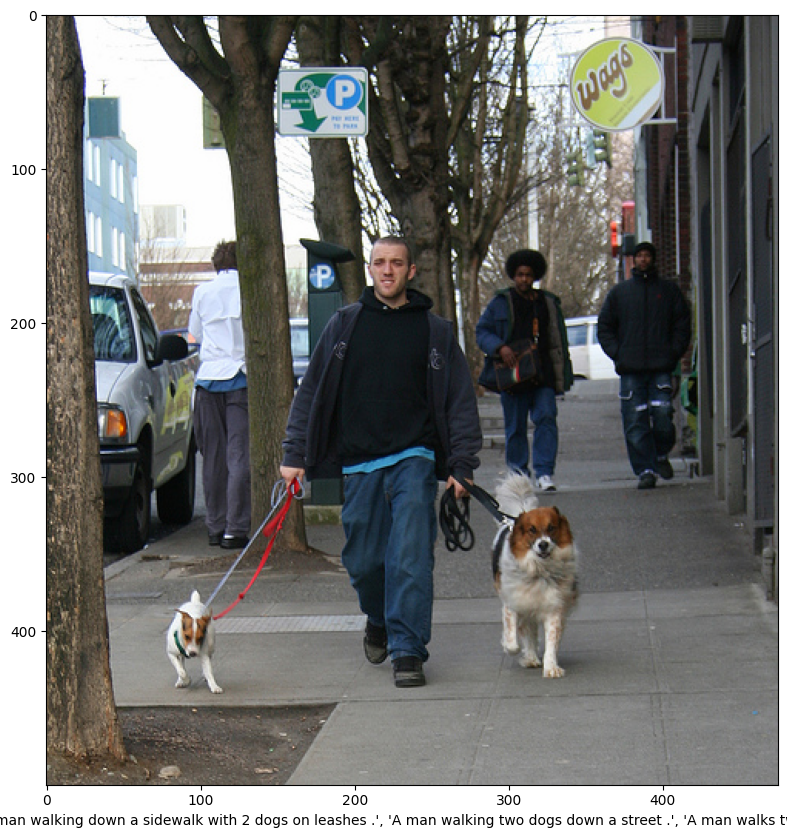

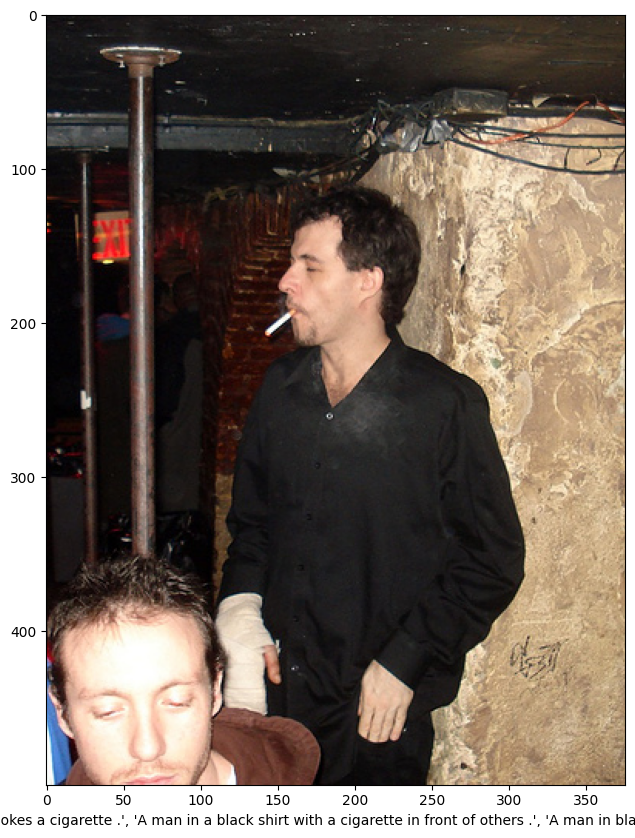

In [ ]:
for i in range(4):
  plt.figure(figsize=(10,10))
  img_name=images[i]
  img=cv2.imread(img_name)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.xlabel(captions_dict[img_name.split('/')[-1]])
  plt.imshow(img)

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
captions_dict

{'3516935867_78cf63c69c.jpg': ['startofseq a black horse and its rider are clearing a 3 rung high jump in a competition . endofseq',
  'startofseq a horse and rider leap over a striped hurdle . endofseq',
  'startofseq a person is riding a horse as it jumps over an obstacle . endofseq',
  'startofseq a person jumping a horse over a fence . endofseq',
  'startofseq a rider and horse jumping a fence outdoors . endofseq'],
 '3516960094_87fb4889de.jpg': ['startofseq a female athlete is jumping into the sand . endofseq',
  'startofseq a girl is performing the long jump with arms in the air . endofseq',
  'startofseq a woman competing in a long jump competition . endofseq',
  'startofseq the woman is jumping a long distance while people watch . endofseq',
  'startofseq woman competing in the long jump , photographed in midair . endofseq'],
 '3517023411_a8fbd15230.jpg': ['startofseq a biker is racing to keep up with the runners endofseq',
  'startofseq a biker rides down the street . endofseq

### **Create Vocabulary**

In [ ]:
count_words = {}
for k,v in captions_dict.items():
    for vv in v:
        for word in vv.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
count_words

{'startofseq': 7499,
 'a': 11769,
 'black': 725,
 'horse': 57,
 'and': 1613,
 'its': 189,
 'rider': 33,
 'are': 665,
 'clearing': 4,
 '3': 2,
 'rung': 0,
 'high': 37,
 'jump': 71,
 'in': 3585,
 'competition': 4,
 '.': 6792,
 'endofseq': 7499,
 'leap': 4,
 'over': 243,
 'striped': 32,
 'hurdle': 21,
 'person': 294,
 'is': 1678,
 'riding': 156,
 'as': 182,
 'it': 89,
 'jumps': 179,
 'an': 462,
 'obstacle': 18,
 'jumping': 270,
 'fence': 42,
 'outdoors': 27,
 'female': 20,
 'athlete': 2,
 'into': 214,
 'the': 3408,
 'sand': 85,
 'girl': 691,
 'performing': 32,
 'long': 57,
 'with': 1504,
 'arms': 51,
 'air': 184,
 'woman': 638,
 'competing': 3,
 'distance': 22,
 'while': 341,
 'people': 518,
 'watch': 42,
 ',': 670,
 'photographed': 2,
 'midair': 39,
 'biker': 31,
 'racing': 25,
 'to': 636,
 'keep': 1,
 'up': 236,
 'runners': 5,
 'rides': 82,
 'down': 324,
 'street': 202,
 'man': 1343,
 'on': 2038,
 'red': 531,
 'bicycle': 69,
 'past': 36,
 'several': 56,
 'pedestrians': 2,
 'something': 

In [ ]:
len(count_words)

3962

In [ ]:
count_words["the"]

3408

In [ ]:
count = 1
new_dict = {}
for k,v in count_words.items():
      new_dict[k] = count
      count += 1

In [ ]:
new_dict

{'startofseq': 1,
 'a': 2,
 'black': 3,
 'horse': 4,
 'and': 5,
 'its': 6,
 'rider': 7,
 'are': 8,
 'clearing': 9,
 '3': 10,
 'rung': 11,
 'high': 12,
 'jump': 13,
 'in': 14,
 'competition': 15,
 '.': 16,
 'endofseq': 17,
 'leap': 18,
 'over': 19,
 'striped': 20,
 'hurdle': 21,
 'person': 22,
 'is': 23,
 'riding': 24,
 'as': 25,
 'it': 26,
 'jumps': 27,
 'an': 28,
 'obstacle': 29,
 'jumping': 30,
 'fence': 31,
 'outdoors': 32,
 'female': 33,
 'athlete': 34,
 'into': 35,
 'the': 36,
 'sand': 37,
 'girl': 38,
 'performing': 39,
 'long': 40,
 'with': 41,
 'arms': 42,
 'air': 43,
 'woman': 44,
 'competing': 45,
 'distance': 46,
 'while': 47,
 'people': 48,
 'watch': 49,
 ',': 50,
 'photographed': 51,
 'midair': 52,
 'biker': 53,
 'racing': 54,
 'to': 55,
 'keep': 56,
 'up': 57,
 'runners': 58,
 'rides': 59,
 'down': 60,
 'street': 61,
 'man': 62,
 'on': 63,
 'red': 64,
 'bicycle': 65,
 'past': 66,
 'several': 67,
 'pedestrians': 68,
 'something': 69,
 'orange': 70,
 'his': 71,
 'helmet': 7

In [ ]:
len(new_dict)

3962

In [ ]:
new_dict['<OUT>'] = len(new_dict)

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
for k, v in captions_dict.items():
    for vv in v:
        encoded = []
        for word in vv.split():
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])
        captions_dict[k][v.index(vv)] = encoded

In [ ]:
captions_dict

{'3516935867_78cf63c69c.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   13,
   14,
   2,
   15,
   16,
   17],
  [1, 2, 4, 5, 7, 18, 19, 2, 20, 21, 16, 17],
  [1, 2, 22, 23, 24, 2, 4, 25, 26, 27, 19, 28, 29, 16, 17],
  [1, 2, 22, 30, 2, 4, 19, 2, 31, 16, 17],
  [1, 2, 7, 5, 4, 30, 2, 31, 32, 16, 17]],
 '3516960094_87fb4889de.jpg': [[1, 2, 33, 34, 23, 30, 35, 36, 37, 16, 17],
  [1, 2, 38, 23, 39, 36, 40, 13, 41, 42, 14, 36, 43, 16, 17],
  [1, 2, 44, 45, 14, 2, 40, 13, 15, 16, 17],
  [1, 36, 44, 23, 30, 2, 40, 46, 47, 48, 49, 16, 17],
  [1, 44, 45, 14, 36, 40, 13, 50, 51, 14, 52, 16, 17]],
 '3517023411_a8fbd15230.jpg': [[1, 2, 53, 23, 54, 55, 56, 57, 41, 36, 58, 17],
  [1, 2, 53, 59, 60, 36, 61, 16, 17],
  [1, 2, 62, 63, 2, 64, 65, 59, 66, 67, 68, 16, 17],
  [1, 2, 62, 41, 69, 70, 63, 71, 72, 24, 2, 73, 14, 2, 74, 75, 16, 17],
  [1, 62, 59, 63, 65, 25, 76, 48, 77, 16, 17]],
 '3517040752_debec03376.jpg': [[1,
   2,
   78,
   79,
   80,
   2,
   81,

In [ ]:
MAX_LEN=0
for k,v in captions_dict.items():
  for vv in v:
    if len(vv)>MAX_LEN:
      MAX_LEN=len(vv)

In [ ]:
MAX_LEN

34

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):

    X = []
    y_in = []
    y_out = []

    for k, v in caption.items():
        for vv in v:
            for i in range(1, len(vv)):
                X.append(photo[k])

                in_seq= [vv[:i]]
                out_seq = vv[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
    return X, y_in, y_out

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
for i in range(10):
    print(y_in[i])
    print(y_out[i])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 1. ... 0. 0. 0.]
[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[1 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[1 2 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[1 2 3 4 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[1 2 3 4 5 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[1 2 3 4 5 6 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[1 2 3 4 5 6 7 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[1 2 3 4 5 6 7 8 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 1. ... 0. 0. 0.]
[1 2 3 4 5 6 7 8 9 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
len(X), len(y_in), len(y_out)

(96564, 96564, 96564)

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(96564, 2048)

In [ ]:
y_in = np.array(y_in, dtype='float64')

In [ ]:
y_in.shape

(96564, 34)

In [ ]:
y_out=np.array(y_out,dtype="float64")

In [ ]:
y_out.shape

(96564, 3963)

In [ ]:
X[20]

array([0.02767965, 0.18500711, 0.04135438, ..., 0.30195475, 0.15439501,
       0.        ], dtype=float32)

In [ ]:
y_in[20]

array([1., 2., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_out[20]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
embedding_size=128
vocab_size=len(new_dict)

image_model=tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(128,input_shape=(2048,),activation="relu"),
    tensorflow.keras.layers.RepeatVector(MAX_LEN)
])
image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 34, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
language_model=tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Embedding(input_dim=vocab_size,output_dim=128,input_length=MAX_LEN),
    tensorflow.keras.layers.LSTM(256,return_sequences=True),
    tensorflow.keras.layers.TimeDistributed(tensorflow.keras.layers.Dense(128))
])

language_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           507264    
                                                                 
 lstm (LSTM)                 (None, 34, 256)           394240    
                                                                 
 time_distributed (TimeDistr  (None, 34, 128)          32896     
 ibuted)                                                         
                                                                 
Total params: 934,400
Trainable params: 934,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conca=tensorflow.keras.layers.Concatenate()([image_model.output,language_model.output])

In [ ]:
x=tensorflow.keras.layers.LSTM(128,return_sequences=True)(conca)
x=tensorflow.keras.layers.LSTM(512,return_sequences=False)(x)
x=tensorflow.keras.layers.Dense(vocab_size)(x)
out=tensorflow.keras.layers.Activation("softmax")(x)
model=tensorflow.keras.models.Model(inputs=[image_model.input,language_model.input], outputs=out)
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 embedding_input (InputLayer)   [(None, 34)]         0           []                               
                                                                                                  
 dense_input (InputLayer)       [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 128)      507264      ['embedding_input[0][0]']        
                                                                                                  
 dense (Dense)                  (None, 128)          262272      ['dense_input[0][0]']            
                                                                                            

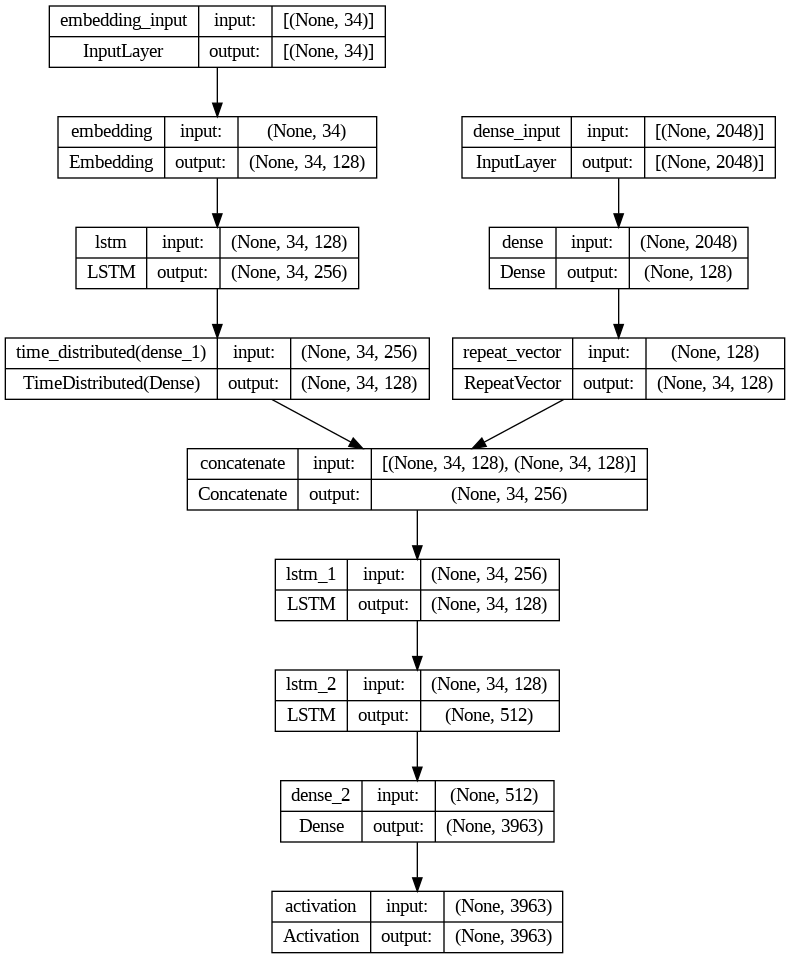

In [ ]:
tensorflow.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.fit([X,y_in],y_out, batch_size=512,epochs=2)

Epoch 1/2
189/189 [==============================] - 33s 135ms/step - loss: 5.3224 - accuracy: 0.1146
Epoch 2/2
189/189 [==============================] - 17s 90ms/step - loss: 5.1423 - accuracy: 0.1194


In [ ]:
inv_dict={v:k for k,v in new_dict.items()}

In [ ]:
def pred(im):
  test_img=cv2.imread(im[0])

  test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

  lol=cv2.resize(test_img,(224,224))
  lol=np.reshape(lol,(1,224,224,3))

  test_feature=my_model.predict(lol).reshape(1,2048)

  text_input=["startofseq"]
  count=0
  caption=""
  while count<25:
    count+=1
    encoded=[]
    for i in text_input:
      encoded.append(new_dict[i])
    encoded=[encoded]
    encoded=pad_sequences(encoded, padding="post", truncating="post", maxlen=MAX_LEN)
    prediction=np.argmax(model.predict([test_feature, encoded]))
    sampled_word=inv_dict[prediction]
    caption=caption+" "+sampled_word
    if sampled_word=="endofseq":
      break
    text_input.append(sampled_word)

  return caption[:-9]

In [ ]:
img_name=glob("/content/drive/MyDrive/Photo /IMG_20220505_213833.jpg")

In [ ]:
pred(img_name)

1/1 [==============================] - 0s 21ms/step


' a a a a a a a a a a a a a a a a a a a a '